In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
iris=load_iris()
samples=iris.data
model=KMeans(n_clusters=3)
model.fit(samples)
labels=model.predict(samples)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


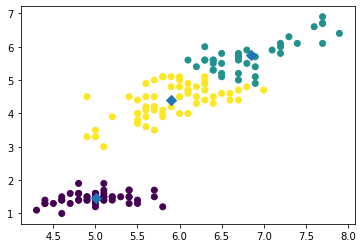

In [3]:
# plotting sepal length and petal length
xs=samples[:,0]
ys=samples[:,2]
plt.scatter(xs,ys,c=labels)
centroids=model.cluster_centers_
centroids_x=centroids[:,0]
centroids_y=centroids[:,2]
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

In [8]:
wine = pd.read_csv('C:/Users/Adinath/Desktop/Data_Science/Assignments/PCA/Wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
wine.columns=['Class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline'] 
wine.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
wine_class=wine['Class']
wine.drop('Class',axis=1,inplace=True)

In [12]:
model=KMeans(n_clusters=3)
labels=model.fit_predict(wine)

df=pd.DataFrame({'labels':labels , 'class':wine_class})
ct=pd.crosstab(df['labels'],df['class'])
ct

class,1,2,3
labels,,,
0,13,20,29
1,46,1,0
2,0,50,19


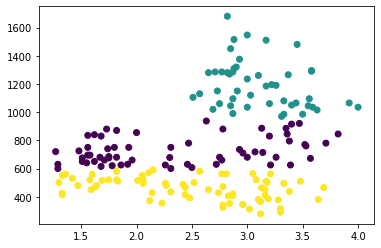

In [13]:
xs=wine.loc[:,'OD280']
ys=wine.loc[:,'Proline']
plt.scatter(xs,ys,c=labels)

In [14]:
wine.var(axis=0)

Alcohol                     0.659062
Malic_acid                  1.248015
Ash                         0.075265
Alcalinity_of_ash          11.152686
Magnesium                 203.989335
Total_phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_phenols        0.015489
Proanthocyanins             0.327595
Color_intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64

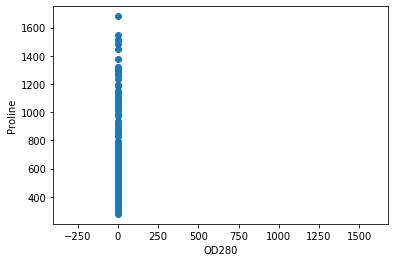

In [15]:
# Variance comparison between Proline and OD280
plt.scatter(wine['OD280'],wine['Proline'])
plt.xlim(-400,max(wine['Proline']))
plt.xlabel('OD280')
plt.ylabel('Proline')
plt.show()

Applying Standard Scaler (then KMeans in sklearn Pipeline)

In [16]:
#Applying Standard Scaler (then KMeans in sklearn Pipeline)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler=StandardScaler()
kmeans=KMeans(n_clusters=3)
pipeline=make_pipeline(scaler,kmeans)
pipeline.fit(wine)
labels=pipeline.predict(wine)

In [17]:
df=pd.DataFrame({'labels':labels,'class':wine_class   }) 
ct=pd.crosstab(df['labels'],df['class'])
ct
# After scaling we get tight clusters

class,1,2,3
labels,,,
0,0,65,0
1,0,3,48
2,59,3,0


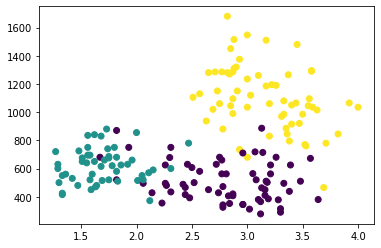

In [18]:
xs=wine.loc[:,'OD280']
ys=wine.loc[:,'Proline']
plt.scatter(xs,ys,c=labels)

In [19]:
scaled_wine=scaler.fit_transform(wine)
scaled_wine.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
scaled_wine=pd.DataFrame(scaled_wine)
scaled_wine.columns=['Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline']  

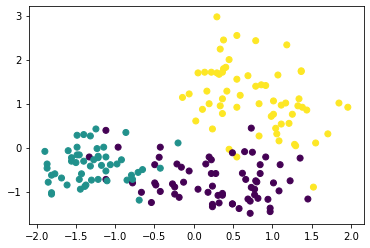

In [21]:
lables=KMeans(n_clusters=3).fit_predict(scaled_wine)
xs=scaled_wine.loc[:,'OD280']
ys=scaled_wine.loc[:,'Proline']
plt.scatter(xs,ys,c=labels)

Visualization with hierarchical clustering and t-SNE
Hierarchical Clustering

In [22]:
from scipy.cluster.hierarchy import linkage,dendrogram , fcluster

In [26]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
iris=load_iris()
data=iris.data
species=iris.target

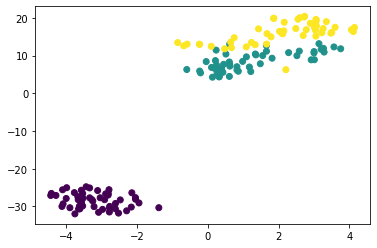

In [27]:
import seaborn as sns
model=TSNE(learning_rate=100)
transformed=model.fit_transform(data)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=species)
#plt.legend(species)
#sns.scatterplot(xs,ys,hue=species)
plt.show()

In [28]:
# WINE DATA
# Samples contain two wine features 
samples=wine[['Total_phenols','OD280']]
from sklearn.decomposition import PCA
model=PCA()
model.fit(samples)
transformed=model.transform(samples)
print(model.components_)
transformed[:10]

[[-0.64116665 -0.76740167]
 [-0.76740167  0.64116665]]


array([[-1.32771994,  0.45139607],
       [-0.83249607,  0.23309966],
       [-0.75216868, -0.02947892],
       [-1.64026613, -0.65572401],
       [-0.56799228, -0.18335891],
       [-0.80794847, -0.59533103],
       [-0.87445337,  0.46361991],
       [-0.93857004,  0.38687974],
       [-0.50660014, -0.23465224],
       [-1.15919131,  0.07603211]])